In [160]:
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa as lb
import numpy as np
import pylab

In [161]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# wr = wave.open('cb.wav', 'r')
# sz = 44100 # Read and process 1 second at a time.
# da = np.fromstring(wr.readframes(sz), dtype=np.int16)
# left, right = da[0::2], da[1::2]

In [162]:
input_files = ['0143m.wav','0483m.wav','1232m.wav','2031m.wav','2995m.wav','5678m.wav','6363m.wav','8376m.wav','0695.wav','1472.wav','1689.wav','1764.wav','2170.wav','2587.wav','3870.wav','4703.wav']

In [163]:
real_output = [[1,0],[1,0],[1,0],[1,0], [1,0], [1,0], [1,0],[1,0],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]

In [164]:
len(input_files)

16

In [165]:
len(real_output)

16

In [166]:
train_data = np.empty((0,128,50,1))
label = np.empty((0,2))

In [167]:
train_data.shape

(0, 128, 50, 1)

0
1


/home/rishabhlucky/Documents/Virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


2
3
4
5
6
7
8
9
10
11
12
13
14
15


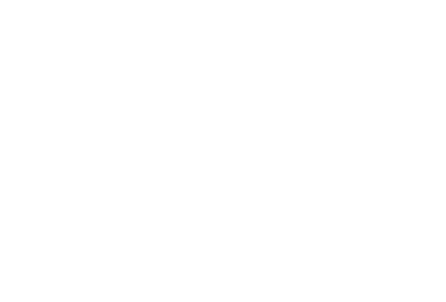

In [168]:
for counter in range(16):
    print (counter)
    y, sr = lb.load(input_files[counter])
    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
    S = lb.feature.melspectrogram(y, sr)
    sm=0
    for i in range(0,c):
        for j in range(0,r):
            sm=sm+S[j][i]
    sm=sm/(r*c)
    S=S*(100/sm)
    s = np.log10(S+0.0001)+5
    z=s[:,30:80]
    
    t1 = z.reshape(128, 50, 1)
    
    l1 = [0,0]
    l1[real_output[counter][0]] = 1
    
    tx=[t1]
    lx=[l1]
    train_data=np.concatenate((train_data,tx), axis=0, out=None)
    label=np.concatenate((label,lx), axis=0, out=None)
    

In [169]:
label.shape

(16, 2)

In [170]:
save_path = 'test.jpg'

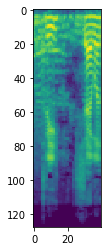

In [171]:
sss1 = np.array(ss1)
s6 = np.log10(sss1+0.0001)+5
plt.imshow(s6)

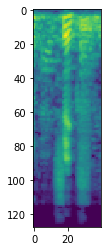

In [172]:
sss2 = np.array(ss2)
s7 = np.log10(sss2+0.0001)+5
plt.imshow(s7)

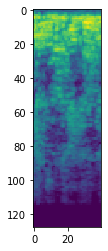

In [173]:
sss3 = np.array(ss3)
s8 = np.log10(sss3+0.0001)+5
plt.imshow(s8)

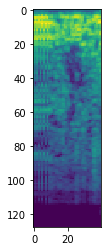

In [174]:
sss4 = np.array(ss4)
s9 = np.log10(sss4+0.0001)+5
plt.imshow(s9)

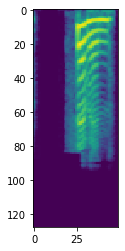

In [175]:
s = np.log10(S+0.0001)+5
z=s[:,30:80]
plt.imshow(z)

In [176]:
# t1 = np.asarray(s6, dtype=float)

# train_data = [td]






train_data.shape

(16, 128, 50, 1)

In [177]:
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

In [178]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 50, 1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])


In [179]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [180]:
model.fit( train_data, label , epochs = 50)

Epoch 1/50
16/16 [==============================] - 0s 21ms/sample - loss: 0.2448 - acc: 0.5000
Epoch 2/50
16/16 [==============================] - 0s 5ms/sample - loss: 0.2552 - acc: 0.5000
Epoch 3/50
16/16 [==============================] - 0s 5ms/sample - loss: 0.1356 - acc: 0.8750
Epoch 4/50
16/16 [==============================] - 0s 5ms/sample - loss: 0.0467 - acc: 1.0000
Epoch 5/50
16/16 [==============================] - 0s 6ms/sample - loss: 0.0304 - acc: 1.0000
Epoch 6/50
16/16 [==============================] - 0s 5ms/sample - loss: 0.0124 - acc: 1.0000
Epoch 7/50
16/16 [==============================] - 0s 5ms/sample - loss: 0.0044 - acc: 1.0000
Epoch 8/50
16/16 [==============================] - 0s 5ms/sample - loss: 0.0059 - acc: 1.0000
Epoch 9/50
16/16 [==============================] - 0s 5ms/sample - loss: 0.0017 - acc: 1.0000
Epoch 10/50
16/16 [==============================] - 0s 5ms/sample - loss: 2.8575e-04 - acc: 1.0000
Epoch 11/50
16/16 [=========================

In [195]:
model.save_weights('./checkpoint_model_2/my_checkpoint')


Consider using a TensorFlow optimizer from `tf.train`.


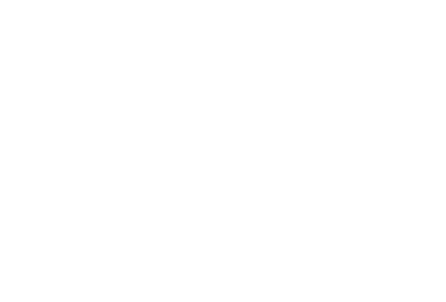

In [216]:
y, sr = lb.load('8376m.wav')
pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
S = lb.feature.melspectrogram(y, sr)
r = len(S)    # 3 rows in your example
c = len(S[0]) # 2 columns in your example
sm=0
for i in range(0,c):
    for j in range(0,r):
        sm=sm+S[j][i]
sm=sm/(r*c)
S=S*(100/sm)
s = np.log10(S+0.0001)+5
z=s[:,30:80]

t1 = z.reshape(128, 50, 1)

tx=np.array([t1])

In [217]:
tx.shape

(1, 128, 50, 1)

In [218]:
prediction = model.predict(tx)

In [219]:
print(prediction)

[[2.5700102e-09 1.0000000e+00]]


In [220]:
print(np.argmax(prediction[0]))

1
